In [9]:
import pandas as pd

In [10]:
reading_json = pd.read_json("Sample Data.txt" , lines = True)

In [11]:
reading_json.to_csv("Sentimental_data.csv" , index = None)

In [12]:
df = pd.read_csv("Sentimental_data.csv")

In [13]:
df.isna().sum()

_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3588
tcooutlinks         3588
media               2224
retweetedTweet      5642
quotedTweet         5424
inReplyToTweetId    5373
inReplyToUser       5373
mentionedUsers      4630
coordinates         5020
place               5020
hashtags               0
cashtags            5627
dtype: int64

In [37]:
df.isna().sum().sum()

51509

# Preprocessing

### Removing stopwords

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda text: cleaning_stopwords(text))
df['content'].head()

0    ⭐ THANK YOU ⭐ Our popular #Sunday night pub qu...
1    Ahhh big stars #gayweho #redressparty #mickysw...
2    Without God week would SINDAY MOURNDAY TEARSDA...
3    #awesome #Attitude #Motivation #commitment #Su...
4    @BadalonaCC #Sunday training @omaree02 @Cricke...
Name: content, dtype: object

In [26]:
df['content']=df['content'].str.lower()
df['content'].head()

0    ⭐ thank you ⭐ our popular #sunday night pub qu...
1    ahhh big stars #gayweho #redressparty #mickysw...
2    without god week would sinday mournday tearsda...
3    #awesome #attitude #motivation #commitment #su...
4    @badalonacc #sunday training @omaree02 @cricke...
Name: content, dtype: object

In [27]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [28]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree  cricketpunt...
Name: content, dtype: object

In [31]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content'].head() 

0    thank you our popular sunday night pub quizzes...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree cricketpuntc...
Name: content, dtype: object

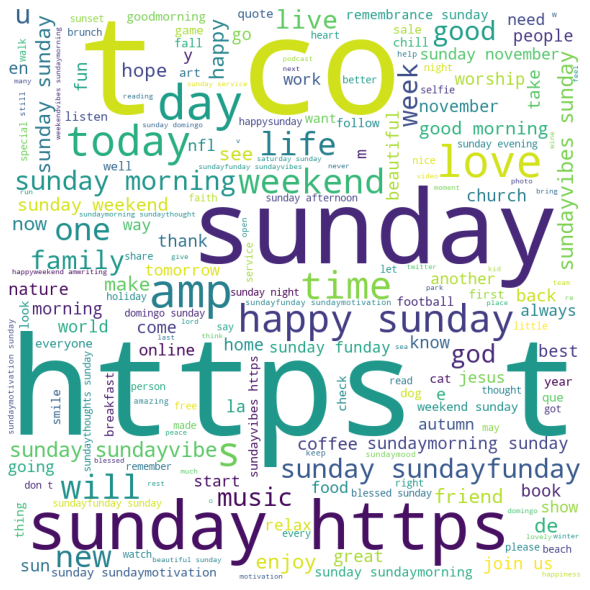

In [35]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"Sentimental_data.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.content:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
